In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Part 2: Classifcation on red and white wine characteristics

First, import the red and the white wine csv fles into separate pandas dataframes from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality (Note: you need to adjust the argument for read_ csv() from sep='' to sep=';') Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".

In [15]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [16]:
# Set new columns for two dataframes
red['winetype'] = 1
white['winetype'] = 0

# Combine both datasets into a single dataframe
wine = pd.concat([red, white])

In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


**2.1** Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

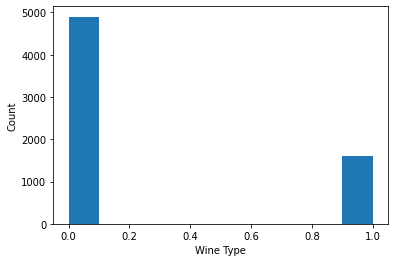

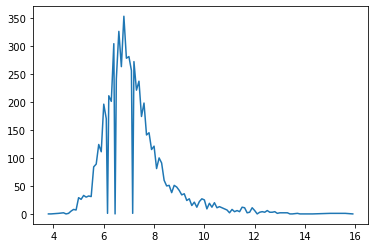

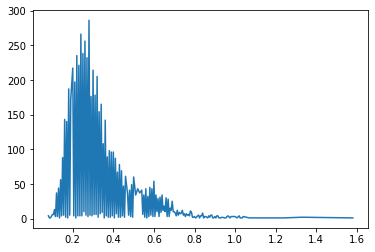

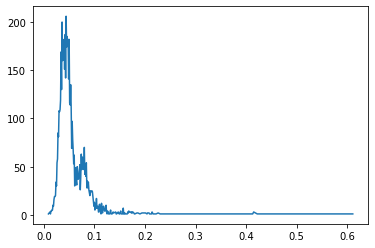

In [18]:
wine['winetype'].plot.hist()
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()

wine['fixed acidity'].value_counts().sort_index().plot.line()
plt.show()

wine['volatile acidity'].value_counts().sort_index().plot.line()
plt.show()

wine['chlorides'].value_counts().sort_index().plot.line()
plt.show()

**2.2** Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [19]:
# Split data into training and test set
y = wine['winetype']
X = wine.loc[:, wine.columns != 'winetype']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [20]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
# Process Data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH','sulphates','alcohol','quality']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

preprocess = preprocess.fit(X_train)

def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [22]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with unscaled data
model = LogisticRegression(penalty='none', max_iter=10000).fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), X_train, y_train))))
print("Test score: {:.3f}".format(model.score(X_test, y_test)))

# Logistic Regression with scaled data
model1 = LogisticRegression(penalty='none', max_iter=10000).fit(preprocessor(X_train), y_train)
print('\n')
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), preprocessor(X_train), y_train))))
print("Test score:{:.3f}".format(model1.score(preprocessor(X_test), y_test)))

Train score:0.992
Test score: 0.986


Train score:0.994
Test score:0.991


The score with scaled data in logistic regression with no penalty is a little bit higher than the unscaled one.

In [24]:
# Penalized Logistic Regression with unscaled data
pl = LogisticRegression(penalty = 'l2', max_iter=10000).fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter=10000), X_train, y_train))))
print("Test score: {:.3f}".format(pl.score(X_test, y_test)))

# Penalized Logistic Regression with scaled data
pl1 = LogisticRegression(penalty = 'l2', max_iter=10000).fit(preprocessor(X_train), y_train)
print('\n')
print("Train score:{:.3f}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter=10000), preprocessor(X_train), y_train))))
print("Test score:{:.5f}".format(pl1.score(preprocessor(X_test), y_test)))

Train score:0.986
Test score: 0.982


Train score:0.994
Test score:0.99015


The score with scaled data is a little bit higher than the unscaled one in penalized logistic regression.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with unscaled data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train))))
print("Test score:{:.3f}".format(knn.score(X_test, y_test)))

# KNN with scaled data
knn.fit(preprocessor(X_train), y_train)
print('\n')
print("Train score:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(), preprocessor(X_train), y_train))))
print("Test score:{:.3f}".format(knn.score(preprocessor(X_test), y_test)))

Train score:0.943
Test score:0.938


Train score:0.992
Test score:0.989


- The score with scaled data is higher than the unscaled one in KNN. And the improvement is more obvious than logistic regression and penalized logistic regression
- The three models all perform well with scaled data 

**2.3** Tune the parameters where possible using GridSearchCV. Do the results
improve?

In [26]:
from sklearn.model_selection import GridSearchCV

# Penalized logistic model with GridSearchCV
param_grid = {'C': np.arange(.01, 10, .1),'penalty':['l2']}
gridmodel = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid, cv=5)
gridmodel.fit(preprocessor(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))
print("test-set score: {:.5f}".format(gridmodel.score(preprocessor(X_test), y_test)))

# KNN with GridSearchCV
param_grid1 = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid1, cv=5)
grid.fit(preprocessor(X_train), y_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(preprocessor(X_test), y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 3.51, 'penalty': 'l2'}
test-set score: 0.99077


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 1}
test-set score: 0.99077


For penalized logistic regression and KNN, the test-set score both becomes a little better.

**2.4** Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [27]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

# Penalized logistic model with GridSearchCV
param_grid = {'C': np.arange(.1, 10, .1),'penalty':['l2']}
gridmodel = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid, cv=kfold)
gridmodel1 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid, cv=skfold)
gridmodel.fit(preprocessor(X_train), y_train)
gridmodel1.fit(preprocessor(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))
print("test-set score: {:.5f}".format(gridmodel.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(gridmodel1.best_score_))
print("best parameters: {}".format(gridmodel1.best_params_))
print("test-set score: {:.5f}".format(gridmodel1.score(preprocessor(X_test), y_test)))

# KNN with GridSearchCV
param_grid1 = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid1, cv=kfold)
grid1 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid1, cv=skfold)
grid.fit(preprocessor(X_train), y_train)
grid1.fit(preprocessor(X_train), y_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {:.5f}".format(grid1.score(preprocessor(X_test), y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 4.9, 'penalty': 'l2'}
test-set score: 0.99077


best mean cross-validation score: 0.994
best parameters: {'C': 1.1, 'penalty': 'l2'}
test-set score: 0.99015


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 9}
test-set score: 0.98954


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 5}
test-set score: 0.98892


- From kfold to skfold, the result can be different
- For penalized logisstic model, kfold performs better than skfold; for KNN, skfold performs better than kfold

In [28]:
# Change the random seed of the shuffling
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
skfold1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Penalized logistic model with GridSearchCV
param_grid2 = {'C': np.arange(.1, 10, .1),'penalty':['l2']}
model2 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=kfold1)
model3 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=skfold1)
model2.fit(preprocessor(X_train), y_train)
model3.fit(preprocessor(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(model2.best_score_))
print("best parameters: {}".format(model2.best_params_))
print("test-set score: {:.5f}".format(model2.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model3.best_score_))
print("best parameters: {}".format(model3.best_params_))
print("test-set score: {:.5f}".format(model3.score(preprocessor(X_test), y_test)))

# KNN with GridSearchCV
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)}
model4 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=kfold1)
model5 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=skfold1)
model4.fit(preprocessor(X_train), y_train)
model5.fit(preprocessor(X_train), y_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(model4.best_score_))
print("best parameters: {}".format(model4.best_params_))
print("test-set score: {:.5f}".format(model4.score(preprocessor(X_test), y_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model5.best_score_))
print("best parameters: {}".format(model5.best_params_))
print("test-set score: {:.5f}".format(model5.score(preprocessor(X_test), y_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 6.3, 'penalty': 'l2'}
test-set score: 0.99138


best mean cross-validation score: 0.994
best parameters: {'C': 1.2000000000000002, 'penalty': 'l2'}
test-set score: 0.99077


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 5}
test-set score: 0.98892


best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 9}
test-set score: 0.98954


Through changing the random seed of the shuffling, the result can be different.

In [32]:
# Change the random state of the split into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=15) 
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
skfold1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Penalized logistic model with GridSearchCV
param_grid2 = {'C': np.arange(.1, 10, .1),'penalty':['l2']}
model6 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=kfold1)
model7 = GridSearchCV(LogisticRegression(solver ='newton-cg'), param_grid=param_grid2, cv=skfold1)
model6.fit(preprocessor(X1_train), y1_train)
model7.fit(preprocessor(X1_train), y1_train)
print("best mean cross-validation score: {:.3f}".format(model6.best_score_))
print("best parameters: {}".format(model6.best_params_))
print("test-set score: {:.5f}".format(model6.score(preprocessor(X1_test), y1_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model7.best_score_))
print("best parameters: {}".format(model7.best_params_))
print("test-set score: {:.5f}".format(model7.score(preprocessor(X1_test), y1_test)))

# KNN with GridSearchCV
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)}
model8 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=kfold1)
model9 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=skfold1)
model8.fit(preprocessor(X1_train), y1_train)
model9.fit(preprocessor(X1_train), y1_train)
print('\n')
print("best mean cross-validation score: {:.3f}".format(model8.best_score_))
print("best parameters: {}".format(model9.best_params_))
print("test-set score: {:.5f}".format(model8.score(preprocessor(X1_test), y1_test)))
print('\n')
print("best mean cross-validation score: {:.3f}".format(model9.best_score_))
print("best parameters: {}".format(model9.best_params_))
print("test-set score: {:.5f}".format(model9.score(preprocessor(X1_test), y1_test)))

best mean cross-validation score: 0.994
best parameters: {'C': 0.6, 'penalty': 'l2'}
test-set score: 0.99200


best mean cross-validation score: 0.994
best parameters: {'C': 0.8, 'penalty': 'l2'}
test-set score: 0.99323


best mean cross-validation score: 0.993
best parameters: {'n_neighbors': 1}
test-set score: 0.99200


best mean cross-validation score: 0.993
best parameters: {'n_neighbors': 1}
test-set score: 0.99385


By changing the random state of the split into training and test data, the results become better here.

**2.5** Compare the coefficients of your two best logistic regression models (not knn), do they agree on which features are important?

In [34]:
print("LogisticRegression.coef_: {}".format(model1.coef_))

# Use the GridSearchCV result acquired in 2.4
pl2 = LogisticRegression(C=6.3, penalty = 'l2', max_iter=10000).fit(preprocessor(X_train), y_train)
print("PenalizedLogisticRegression.coef_: {}".format(pl2.coef_))

LogisticRegression.coef_: [[ 0.23593592  1.58974487 -0.28658209 -4.93808655  0.79248033  1.29840838
  -3.18179794  4.53207344  0.0204608   0.62839167  1.51230794  0.34655891]]
PenalizedLogisticRegression.coef_: [[ 0.36756793  1.58110405 -0.28390972 -4.47945942  0.81332624  1.19450871
  -3.09652535  4.10144516  0.13925589  0.66051118  1.32226698  0.32522912]]


- The coefficients of the two models don't have much difference except for the variable 'pH'.
- 'density' has the most positive influence on 'winetype' while 'residual sugar' has the most negtive impact. 

**2.6** Discuss which final model you would choose to predict new data

The final model I want to use is the logistic regression model with C = 6.3, penalty = 'l2' with scaled data. This model has a relatively high score and at the same time can help shrink the variable coefficients which may exist multicollinearity.